In [1]:
import us
import pandas as pd
import geopandas
import numpy as np

from shapely.geometry import Point
from geopandas.plotting import plot_point_collection
from litecoder.models import WOFLocality

/Users/dclure/.local/share/virtualenvs/us-pop-density-BOzJjxpF/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dclure/.local/share/virtualenvs/us-pop-density-BOzJjxpF/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn-muted')

In [9]:
df = pd.read_table('../data/Gaz_tracts_national.txt', encoding='ISO-8859-1')

In [10]:
len(df)

74002

In [11]:
df.head(10)

,USPS,GEOID,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001020100,1912,752,9809944,36312,3.788,0.014,32.477111,-86.490303
1,AL,1001020200,2170,822,3340505,5846,1.290,0.002,32.475758,-86.472468
2,AL,1001020300,3373,1326,5349274,9054,2.065,0.003,32.474024,-86.459703
3,AL,1001020400,4386,1823,6382705,16244,2.464,0.006,32.471078,-86.444681
4,AL,1001020500,10766,4308,11397725,48412,4.401,0.019,32.458916,-86.421817
5,AL,1001020600,3668,1452,8020366,60048,3.097,0.023,32.447347,-86.476802
6,AL,1001020700,2891,1301,22408265,781555,8.652,0.302,32.430522,-86.436911
7,AL,1001020801,3081,1169,124282110,8113962,47.986,3.133,32.411723,-86.531683
8,AL,1001020802,10435,4003,190810921,678023,73.673,0.262,32.547133,-86.531596
9,AL,1001020900,5675,2320,292756814,516158,113.034,0.199,32.637012,-86.514947


In [12]:
df['point'] = df.apply(lambda r: Point(r.INTPTLONG, r.INTPTLAT), axis=1)

In [13]:
gdf = geopandas.GeoDataFrame(df, geometry='point')

In [14]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [29]:
def plot_state(state):
    ax = states[states.STUSPS==state].plot(color='white', edgecolor='black', figsize=(20,20))
    sdf = gdf[gdf.USPS==state]
    plot_point_collection(ax, sdf.point, markersize=sdf.POP10 / 200, alpha=1, cmap='Reds', edgecolor='black')

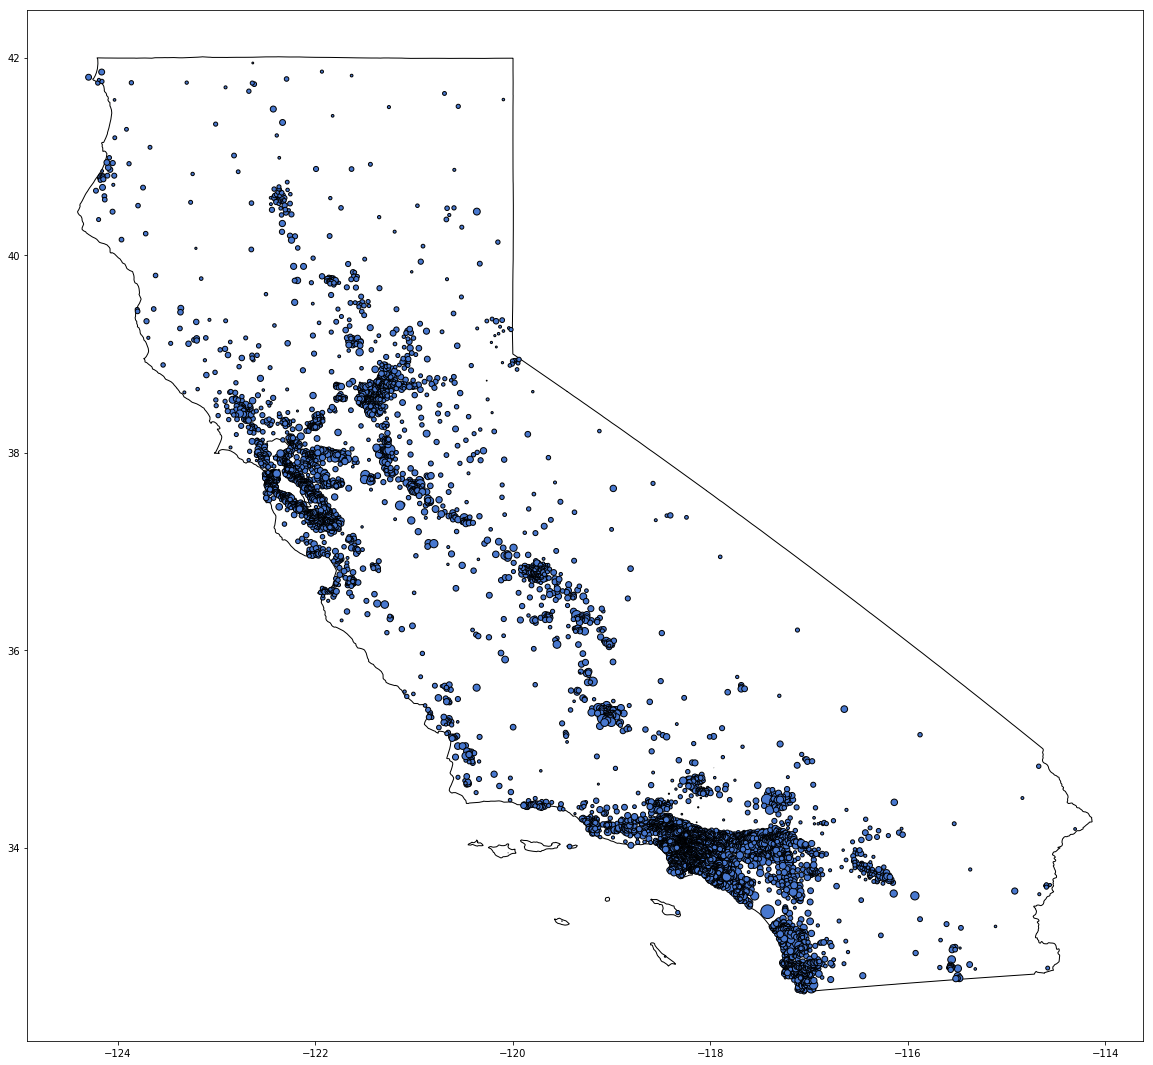

In [30]:
plot_state('CA')